# Advertising-Impact-Analysing

The goal of this project is to analyze the impact of various advertising strategies on customer behavior and overall business performance. By examining customer data and marketing metrics, the project aims to identify which channels and campaigns yield the highest return on investment (ROI) and influence customer conversion rates most effectively.

## **Step 1 : Import Libraries and Load Data**

* **pandas**: Used for data manipulation and analysis, offering powerful data structures like DataFrames to handle and process structured data efficiently.
* **numpy**: Provides support for numerical operations on large multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
* **matplotlib.pyplot**: Used for cremating static, interactive, and animated visualizations in Python, enabling plotting of various graphs such as line charts, scatter plots, and histograms.
* **seaborn**: A data visualization library built on matplotlib, providing a high-level interface to create statistical graphics such as heatmaps, pair plots, and box plots.
* **sklearn.model_selection**:
    * **train_test_split**: Splits the dataset into training and testing sets, ensuring an appropriate balance for model training and validation.
* **sklearn.preprocessing**:
  * **StandardScaler**: Standardizes features by removing the mean and scaling to unit variance, ensuring all features contribute equally to the model.
  * **OneHotEncoder**: Converts categorical variables into a binary matrix (dummy variables), enabling models to interpret non-numerical features.
* **sklearn.linear_model**:
  * **LinearRegression**: Builds a linear model by fitting a straight line to the data, predicting the target variable based on input features.
  * **Ridge**: A variation of linear regression that introduces L2 regularization, which reduces model complexity by penalizing large coefficients.
  * **Lasso**: Applies L1 regularization to linear regression, effectively performing feature selection by shrinking less important feature coefficients to zero.
* **sklearn.metrics**:
  * **mean_squared_error (MSE)**: Measures the average squared difference between actual and predicted values, penalizing large errors.
  * **mean_absolute_error (MAE)**: Computes the average absolute difference between actual and predicted values, giving equal weight to all errors.
  * **r2_score (R²)**: Indicates how well the model fits the data, representing the proportion of variance explained by the model.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
df = pd.read_csv(r"C:\Users\anura\Downloads\Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Step 2 : Exploratory Data Analysis

In [10]:
df.describe

<bound method NDFrame.describe of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [12]:
df.isna()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [18]:
df.isna().any()

Unnamed: 0    False
TV            False
Radio         False
Newspaper     False
Sales         False
dtype: bool

In [20]:
df.isnull()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [22]:
df.shape

(200, 5)

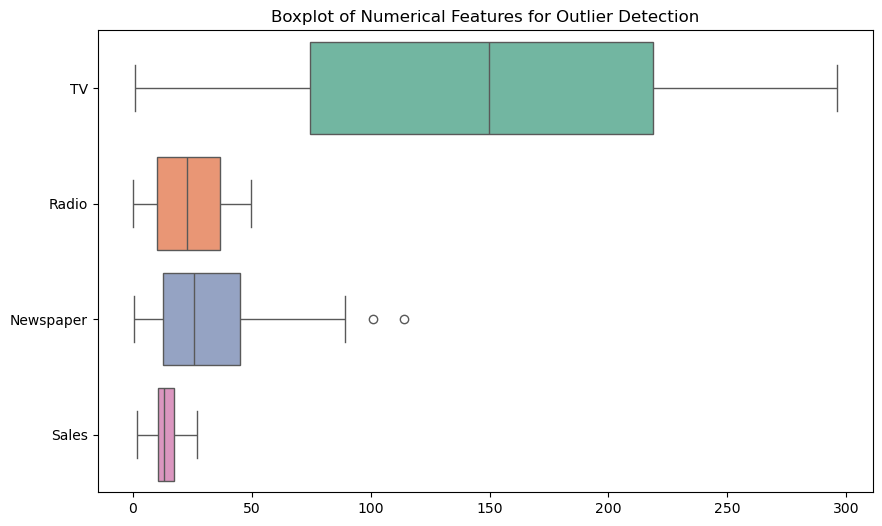

In [21]:
numerical_cols = ['TV', 'Radio', 'Newspaper', 'Sales']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols], orient="h", palette="Set2")
plt.title("Boxplot of Numerical Features for Outlier Detection")
plt.show()

<Axes: >

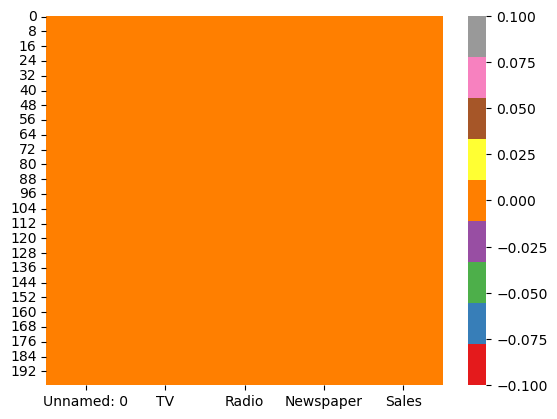

In [72]:
sns.heatmap(df.isnull(), cmap='Set1')

<Axes: >

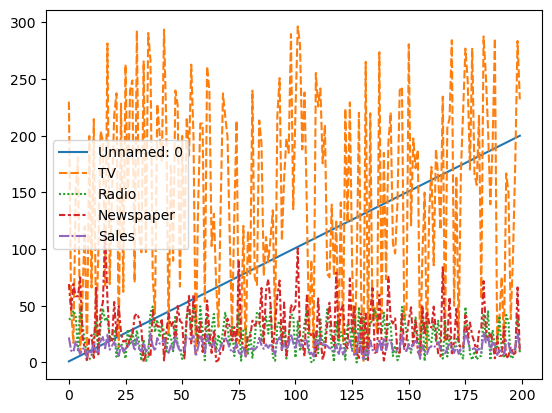

In [70]:
sns.lineplot(data=df)

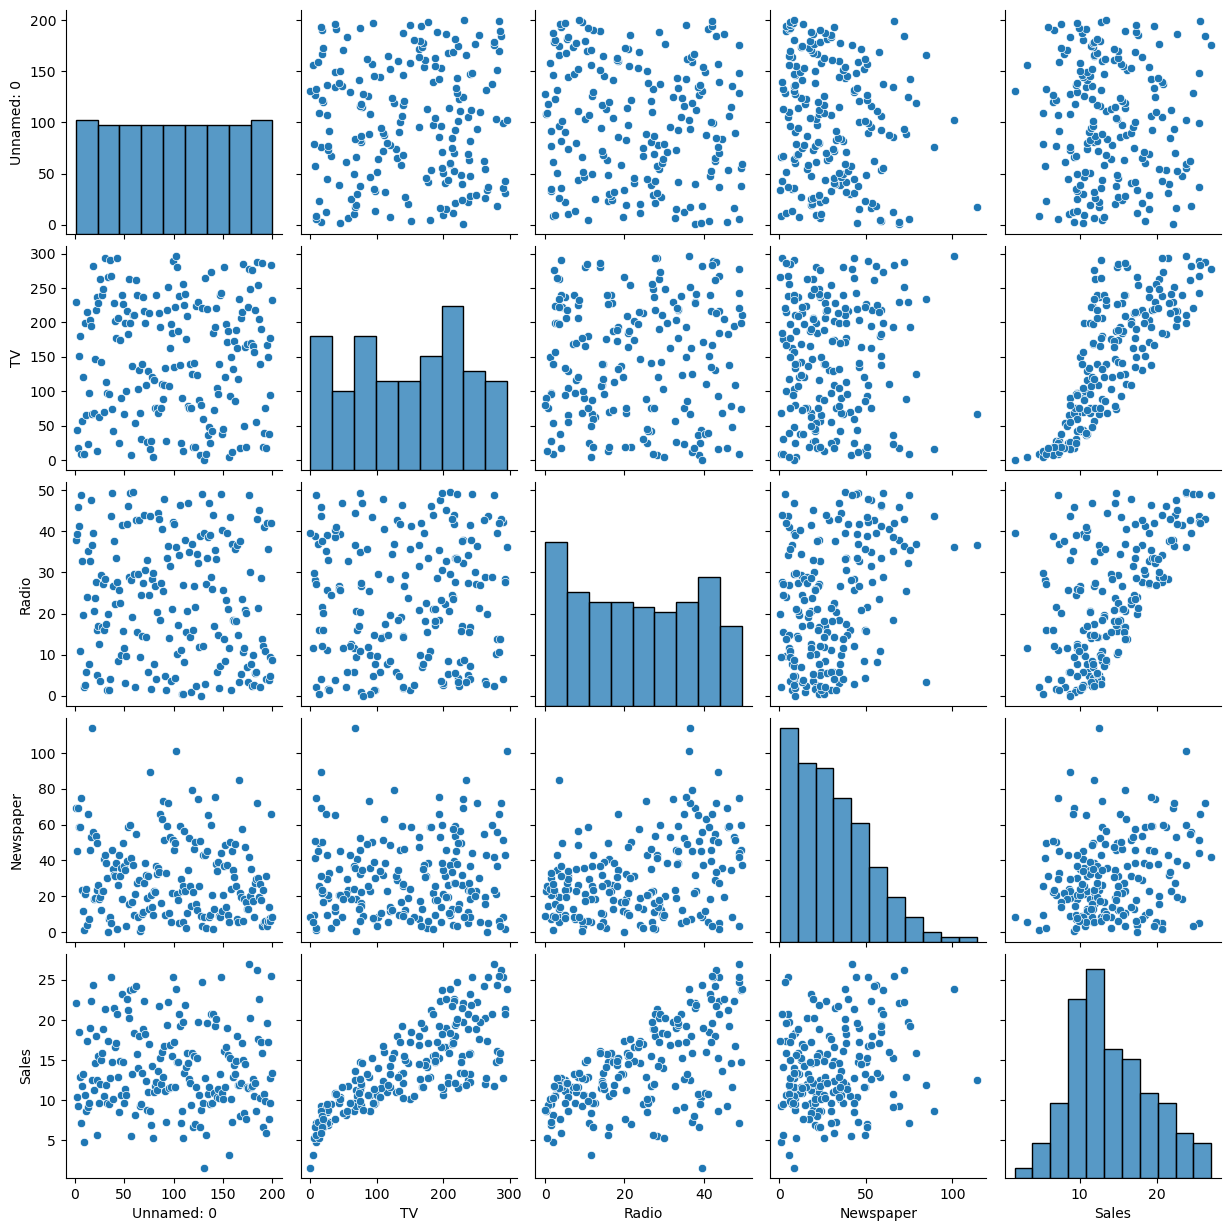

In [23]:
sns.pairplot(df)
plt.show()

In [24]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [26]:
numerical_cols = ['TV','Radio','Newspaper','Sales']
scaler = StandardScaler()
scaled_cols = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

In [28]:
print(scaled_cols)

           TV     Radio  Newspaper     Sales
0    0.969852  0.981522   1.778945  1.552053
1   -1.197376  1.082808   0.669579 -0.696046
2   -1.516155  1.528463   1.783549 -0.907406
3    0.052050  1.217855   1.286405  0.860330
4    0.394182 -0.841614   1.281802 -0.215683
..        ...       ...        ...       ...
195 -1.270941 -1.321031  -0.771217 -1.234053
196 -0.617035 -1.240003  -1.033598 -0.830548
197  0.349810 -0.942899  -1.111852 -0.234898
198  1.594565  1.265121   1.640850  2.205347
199  0.993206 -0.990165  -1.005979 -0.119610

[200 rows x 4 columns]


## Step 3 : Data Preprocessing

 **Remove unnecessary Columns**

**Define features (X) and target (y)**

In [30]:
x = df.drop(columns=['Sales'])
y = df['Sales']

## **Step 4: Model Building**
To train and evaluate an SVM model using various kernels (linear, sigmoid, and RBF) and compare their performance.

Common steps include:
- **Model Training**:
For each kernel type, an Linear Regression model is trained on the scaled features (X_scaled) and labels (y).

- **Prediction**:
The trained model makes predictions on the same dataset (X_scaled).

- **Evaluation Metrics**:

 - **Accuracy**: The proportion of correctly classified instances.
 - **Confusion Matrix**: Breakdown of true and false predictions.
 - **Classification Report**: Provides precision, recall, and F1-score for each class.

**Split into training and testing sets**

* **train_test_split()** splits data into training (80%) and testing (20%) subsets.
* **random_state=42** ensures reproducibility by generating the same split each time.

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state = 42) 

In [34]:
x_train

,Unnamed: 0,TV,Radio,Newspaper
79,80,116.0,7.7,23.1
197,198,177.0,9.3,6.4
38,39,43.1,26.7,35.1
24,25,62.3,12.6,18.3
122,123,224.0,2.4,15.6
...,...,...,...,...
106,107,25.0,11.0,29.7
14,15,204.1,32.9,46.0
92,93,217.7,33.5,59.0
179,180,165.6,10.0,17.6


In [44]:
y_train

79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: Sales, Length: 160, dtype: float64

## **Training the model**

In [36]:
LR = LinearRegression()

In [38]:
LR

LinearRegression()

In [40]:
LR.fit(x_train, y_train)

LinearRegression()

## **Model Evaluation**

In [46]:
y_pred = LR.predict(x_test)

In [48]:
mae = mean_absolute_error(y_test,y_pred)
mae

1.4650601050102936

In [50]:
mse = mean_squared_error(y_test,y_pred)
mse

3.1990044685889036

In [52]:
rsme = np.sqrt(mean_squared_error(y_test,y_pred))
rsme

1.7885761008659664

In [54]:
r2 = r2_score(y_test,y_pred)
r2

0.8986489151417081

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso

In [74]:
lr_model = LinearRegression()
lr_score = cross_val_score(lr_model, x_train, y_train, cv=5)

In [76]:
ridge_model = Ridge(alpha=1.0)
ridge_score = cross_val_score(ridge_model, x_train, y_train, cv=5)

In [78]:
lasso_model = Lasso(alpha=1.0)
lasso_score = cross_val_score(lasso_model, x_train, y_train, cv=5)

In [80]:
lr_model.fit(x_train, y_train)
lr_predictions = lr_model.predict(x_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mse
lr_r2 = r2_score(y_test, lr_predictions)
lr_r2

0.8986489151417081

In [82]:
ridge_model.fit(x_train, y_train)
ridge_predictions = ridge_model.predict(x_test)
ridge_r2 = r2_score(y_test, ridge_predictions)
ridge_r2*100

89.86489976571696

In [84]:
lasso_model.fit(x_train, y_train)
lasso_predictions = lasso_model.predict(x_test)
lasso_r2 = r2_score(y_test, lasso_predictions)
lasso_r2*100

90.01586308815881